## Santander Value Prediction Challenge
#### Predict the value of transactions for potential customers.

According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception.

The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.


The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
for p in [np, pd, sns]:
    print(p.__version__)

1.14.3
0.23.0
0.8.1


### Read the data

In [4]:
san = pd.read_csv("../data/train.csv.zip")

In [5]:
san.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [6]:
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


##### Rename the columns to `x1..x4993` for easy reference

In [8]:
old_feature_names = [n for n in san.columns if n not in ('ID','target')]
new_feature_names = ['x'+str(i) for i in range(1,len(san.columns)-1)]
assert len(old_feature_names) == len(new_feature_names)
feature_map = {k:v for (k,v) in zip(new_feature_names, old_feature_names)}

In [9]:
train = san.rename(columns=dict(zip(san.columns, ['ID','target']+new_feature_names))) 

In [10]:
train.head()

,ID,target,x1,x2,x3,x4,x5,x6,x7,x8,...,x4982,x4983,x4984,x4985,x4986,x4987,x4988,x4989,x4990,x4991
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [45]:
# Test Dataset
test = pd.read_csv("../data/test.csv.zip")
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
test = test.rename(columns=dict(zip(test.columns, ['ID','target']+new_feature_names))) 

In [12]:
# Sample submission
# sample_submission = pd.read_csv("../data/sample_submission.csv.zip")
# sample_submission.head()

### Descriptive Statistics

In [13]:
train.describe()

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x4982,x4983,x4984,x4985,x4986,x4987,x4988,x4989,x4990,x4991
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [10]:
sum(train.ID.value_counts() > 1)  # ID is a truly unique identifier

0

### Build a quick baseline

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create a copy to work with
X = train.copy()

# Save and drop labels
y = train.target
X = X.drop(['target','ID'], axis=1)

# fill NANs 
X = X.fillna(-999)

   
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [13]:
print("Baseline RMSLE = {0}".format(rmsle(rf.predict(X), y)))

Baseline RMSLE = 1.024804958047456


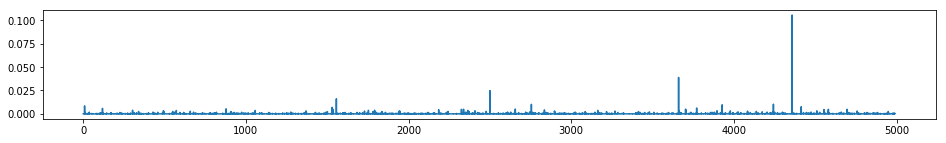

In [21]:
fig = plt.figure(figsize=plt.figaspect(0.1))
ax = fig.add_subplot(111)
ax.plot(rf.feature_importances_)
# ax.set_xticks(np.arange(X.shape[1]));
# ax.set_xticklabels(X.columns.tolist(), rotation=90);

In [29]:
# Top 10 most important features
top10_features = [X.columns.tolist()[i] for i in rf.feature_importances_.argsort()[-10:][::-1]]
top10_features

['x4359',
 'x3661',
 'x2501',
 'x1557',
 'x4244',
 'x2756',
 'x3929',
 'x9',
 'x4415',
 'x1531']

#### Make a baseline submission (PB 1.72)

In [30]:
# test_X = test.iloc[:,1:]
# print("Size of the test dataset = {0}".format(test_X.shape[0]))
# test_y = rf.predict(test_X)
# print("Size of the predicted targets = {0}".format(test_y.shape[0]))

In [31]:
# submission = test.loc[:,['ID']].reindex(columns=['ID','target'])
# submission.loc[:,'target'] = test_y
# submission.to_csv('../data/submission_01_baseline.csv', index=False)

### EDA

#### Target distribution

In [14]:
train['target_log1p'] = np.log1p(train.target)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


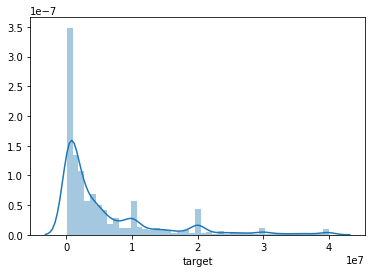

In [15]:
sns.distplot(train.target)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


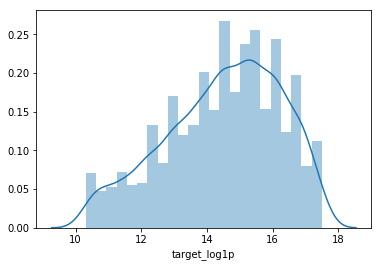

In [16]:
sns.distplot(train.target_log1p)

In [41]:
train.loc[train.target == train.target.max()]

,ID,target,x1,x2,x3,x4,x5,x6,x7,x8,...,x4983,x4984,x4985,x4986,x4987,x4988,x4989,x4990,x4991,target_log1p
102,05bd95a13,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
173,09edae2ab,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
348,14a5d0fe8,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
713,28e98ec00,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
730,29e45ce90,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
985,38d2e57b4,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,2080000.0,0,0,0,0,0,0,0,17.50439
1097,3f5acdbec,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
1112,3fdeecbc5,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
1276,49f470af7,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439
1341,4dad5af86,40000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,17.50439


In [9]:
train.loc[train.target == train.target.min()]

,ID,target,x1,x2,x3,x4,x5,x6,x7,x8,...,x4982,x4983,x4984,x4985,x4986,x4987,x4988,x4989,x4990,x4991
386,16eea6b20,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
604,22f6e346e,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
739,2a464058e,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
997,39645e56c,30000.0,0.0,0,0.0,0,0,0,0,0,...,45280000.00,0.0,0.00,0,0,0,0,0,0,0
1060,3d863f4a2,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,6000000.00,0,0,0,0,0,0,0
1187,4478fa492,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
1562,5a7e6ddaf,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
1749,6685b0103,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
1753,66d1b1e1e,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,254000,0
2027,7571ea529,30000.0,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0


In [10]:
# customers with small target values
customer_sid = 386
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID        16eea6b20
target        30000
x356         700000
x499         400000
x608         200000
x1087       1000000
x1277         30000
x1531        233333
x1608         3e+07
x1895        200000
x2109        300000
x2608         96000
x2741        300000
x2756        800000
x2857        800000
x2876        200000
x3031        200000
x3891         10000
x4205        200000
x4244        400000
x4472       1000000
x4863        200000
x4917        340000
Name: 386, dtype: object

In [11]:
# customers with small target values
customer_sid = 997
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID          39645e56c
target          30000
x10             2e+06
x14          21434000
x36          23144000
x59           2450000
x84            262000
x91           7000000
x109           966667
x119      3.73667e+06
x126         40530000
x204           200000
x243           180000
x244          6200000
x376        4.528e+07
x393        8.759e+06
x520         50000000
x536          2000000
x541           800000
x550      3.19612e+08
x555           400000
x573          3.5e+07
x575         2.45e+06
x595      3.33513e+07
x635            1e+07
x642          9340000
x659            3e+06
x672          2000000
x679           816500
x717          4.3e+06
             ...     
x4395         3600000
x4415     2.14635e+07
x4419         4.3e+06
x4446      6.4846e+07
x4472          250000
x4495          259000
x4531           4e+06
x4555          830000
x4580      2.0406e+07
x4582        3.09e+06
x4636        32830000
x4661       7.468e+06
x4697       6.208e+06
x4702         5100000
x4709     

In [21]:
# All the non-zero columns
# customers with small target values
customer_sid = 0
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID                000d6aaf2
target              3.8e+07
x38                 1.3e+06
x109            4.33333e+06
x119               1.32e+07
x216                  6e+06
x292                7.1e+06
x459                1.6e+06
x499                6.6e+06
x512                  2e+06
x563              3.205e+06
x573                 400000
x679                 400000
x714                8.3e+06
x725               12800000
x747                  4e+07
x879                 900000
x881                6.2e+06
x917                1.6e+06
x1058                600000
x1087               7200000
x1105               2000000
x1128                 4e+07
x1211                400000
x1304                 3e+06
x1326                 2e+06
x1331                 6e+06
x1358               8000000
x1392              24400000
x1448                 2e+06
                   ...     
x3772               2.8e+07
x3891               1.3e+06
x3979             3.205e+06
x3994               2.2e+07
x3995               

In [29]:
# How many features are zeros
train['num_zeros'] = train.loc[:,new_feature_names].apply(lambda x: np.sum(x==0), axis='columns')
train.head()

In [35]:
# The records with the highest number of zero features
train.loc[train.num_zeros == np.max(train.num_zeros)].head(5)

,ID,target,x1,x2,x3,x4,x5,x6,x7,x8,...,x4984,x4985,x4986,x4987,x4988,x4989,x4990,x4991,target_log1p,num_zeros
36,01a09167b,20000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,16.811243,4990
152,08cb967e3,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,14.508658,4990
485,1bf991897,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,14.508658,4990
759,2bd27f4de,1200000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,13.997833,4990
998,3967ac15e,8780000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,15.987987,4990


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


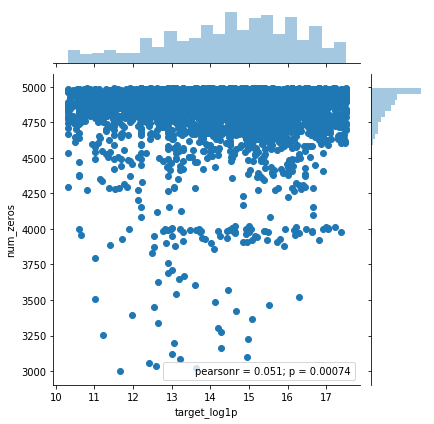

In [40]:
sns.jointplot(train.target_log1p, train.num_zeros)

In [41]:
# Record 36 and 152
customer_sid = 36
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID              01a09167b
target              2e+07
x2160             2.2e+07
target_log1p      16.8112
num_zeros            4990
Name: 36, dtype: object

In [42]:
customer_sid = 152
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID              08cb967e3
target              2e+06
x3671              150000
target_log1p      14.5087
num_zeros            4990
Name: 152, dtype: object

In [43]:
customer_sid = 998
train.iloc[customer_sid].T.iloc[train.iloc[customer_sid].T.nonzero()]

ID              3967ac15e
target           8.78e+06
x356                20000
target_log1p       15.988
num_zeros            4990
Name: 998, dtype: object

In [44]:
train.x356.describe()

count    4.459000e+03
mean     9.551116e+05
std      5.802977e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.328200e+08
Name: x356, dtype: float64

In [47]:
test.x356.describe()

count    4.934200e+04
mean     1.763570e+05
std      4.102696e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.394424e+08
Name: x356, dtype: float64

In [51]:
# how many features are at top 10%
train_quantile = train.loc[:, new_feature_names].quantile(0.90, axis=0, interpolation='higher')
train['num_feat_90th'] = train.loc[:, new_feature_names].apply(lambda x: np.sum(x>train_quantile), axis='columns')

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


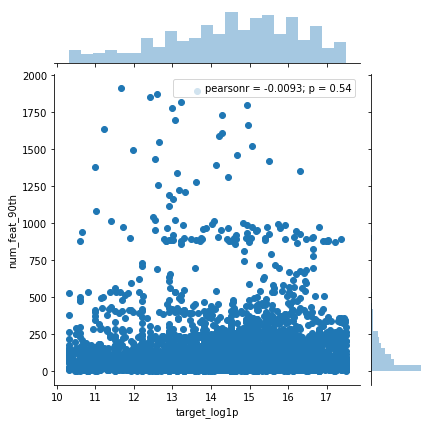

In [52]:
sns.jointplot(train.target_log1p, train.num_feat_90th)